In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
d_frame = pd.read_csv('C:/Users/Harsh/Desktop/npcl.4_id_data.csv')

In [3]:
d_frame=d_frame[['data.grid_reading_kwh','data.grid_kwh_unit','data.creation_time','data.status',
'data.meter_sr_no','data.error_reason','data.R_voltage','data.Y_volatge',
'data.B_voltage', 'data.r_current', 'data.y_current','data.b_current','site_id',
'location_id','data.cumm_pf','data.frequency']]

In [4]:
# Status "P"
combined_df=d_frame[d_frame['data.status']== "P"]

# null values
if combined_df.isnull().sum().sum()>0:
    combined_df.dropna(inplace=True)

# special character
def special_char():
    special_character_pattern = r'[!@#$%^&*()]'
    rows_with_special_chars = combined_df[combined_df['location_id'].str.contains(special_character_pattern, regex=True)]
    return ( rows_with_special_chars)
if combined_df['location_id'].dtype != 'int64':
    special_char()

#  creation time relabelling 
# combined_df['data.creation_time']=pd.to_datetime(combined_df['data.creation_time'])

# integer conversion
# combined_df['grid_reading_kwh']=combined_df['grid_reading_kwh'].round()

In [5]:
id=combined_df['location_id'].unique()

In [6]:
final_lst=[]
for each_id in id:
    df=combined_df[combined_df['location_id'] == each_id ]
    df['data.creation_time']=pd.to_datetime(df['data.creation_time'])
    df.set_index(['data.creation_time'],drop=True, inplace=True)
    df.loc[df['data.error_reason'] == 'No Consumption', 'data.grid_kwh_unit'] = 0



    final_lst.append(df)

final_df = pd.concat(final_lst)

In [7]:
df=final_lst[0]
# df.loc[df['data.error_reason'] == 'No Consumption', 'data.grid_kwh_unit'] = 0


In [8]:
# df1=df['2022-08-31 18:00:22':'2023-01-30 23:29:54']
# df1[30:50]

In [9]:
df_min_1H=df[['data.grid_reading_kwh']].resample(rule='1H').min()
df_min_1H

,data.grid_reading_kwh
data.creation_time,
2021-05-01 00:00:00,164.0
2021-05-01 01:00:00,164.0
2021-05-01 02:00:00,164.0
2021-05-01 03:00:00,165.0
2021-05-01 04:00:00,166.0
...,...
2023-08-17 19:00:00,11855.0
2023-08-17 20:00:00,11856.0
2023-08-17 21:00:00,11857.0


In [10]:
df_resampled=df[['data.grid_reading_kwh']].resample(rule='1H').max()
df_resampled

,data.grid_reading_kwh
data.creation_time,
2021-05-01 00:00:00,164.0
2021-05-01 01:00:00,164.0
2021-05-01 02:00:00,165.0
2021-05-01 03:00:00,166.0
2021-05-01 04:00:00,167.0
...,...
2023-08-17 19:00:00,11856.0
2023-08-17 20:00:00,11857.0
2023-08-17 21:00:00,11858.0


In [11]:
df_resampled['units']=df_resampled['data.grid_reading_kwh']-df_min_1H['data.grid_reading_kwh']
df_resampled

,data.grid_reading_kwh,units
data.creation_time,,
2021-05-01 00:00:00,164.0,0.0
2021-05-01 01:00:00,164.0,0.0
2021-05-01 02:00:00,165.0,1.0
2021-05-01 03:00:00,166.0,1.0
2021-05-01 04:00:00,167.0,1.0
...,...,...
2023-08-17 19:00:00,11856.0,1.0
2023-08-17 20:00:00,11857.0,1.0
2023-08-17 21:00:00,11858.0,1.0


In [13]:
df_resampled['2022-08-31 18:00:22':'2023-01-30 23:29:54'][20:50]

,data.grid_reading_kwh,units
data.creation_time,,
2022-09-01 15:00:00,7548.0,0.0
2022-09-01 16:00:00,7549.0,1.0
2022-09-01 17:00:00,7549.0,0.0
2022-09-01 18:00:00,7549.0,0.0
2022-09-01 19:00:00,7551.0,2.0
2022-09-01 20:00:00,7551.0,0.0
2022-09-01 21:00:00,NaN,NaN
2022-09-01 22:00:00,NaN,NaN
2022-09-01 23:00:00,7555.0,0.0


In [14]:
df_resampled['actual_units']=df[['data.grid_kwh_unit']].resample(rule='1H').sum()

In [15]:
df_resampled['2022-08-31 18:00:22':'2023-01-30 23:29:54'][20:50]

,data.grid_reading_kwh,units,actual_units
data.creation_time,,,
2022-09-01 15:00:00,7548.0,0.0,0.0
2022-09-01 16:00:00,7549.0,1.0,1.0
2022-09-01 17:00:00,7549.0,0.0,0.0
2022-09-01 18:00:00,7549.0,0.0,0.0
2022-09-01 19:00:00,7551.0,2.0,2.0
2022-09-01 20:00:00,7551.0,0.0,0.0
2022-09-01 21:00:00,NaN,NaN,0.0
2022-09-01 22:00:00,NaN,NaN,0.0
2022-09-01 23:00:00,7555.0,0.0,4.0


In [19]:
df_resampled['2021-05-24 16:00:00':'2021-05-25 12:00:00']

,data.grid_reading_kwh,units,actual_units
data.creation_time,,,
2021-05-24 16:00:00,418.0,0.0,0.0
2021-05-24 17:00:00,NaN,NaN,0.0
2021-05-24 18:00:00,NaN,NaN,0.0
2021-05-24 19:00:00,NaN,NaN,0.0
2021-05-24 20:00:00,NaN,NaN,0.0
2021-05-24 21:00:00,NaN,NaN,0.0
2021-05-24 22:00:00,NaN,NaN,0.0
2021-05-24 23:00:00,NaN,NaN,0.0
2021-05-25 00:00:00,NaN,NaN,0.0


<Axes: xlabel='data.creation_time'>

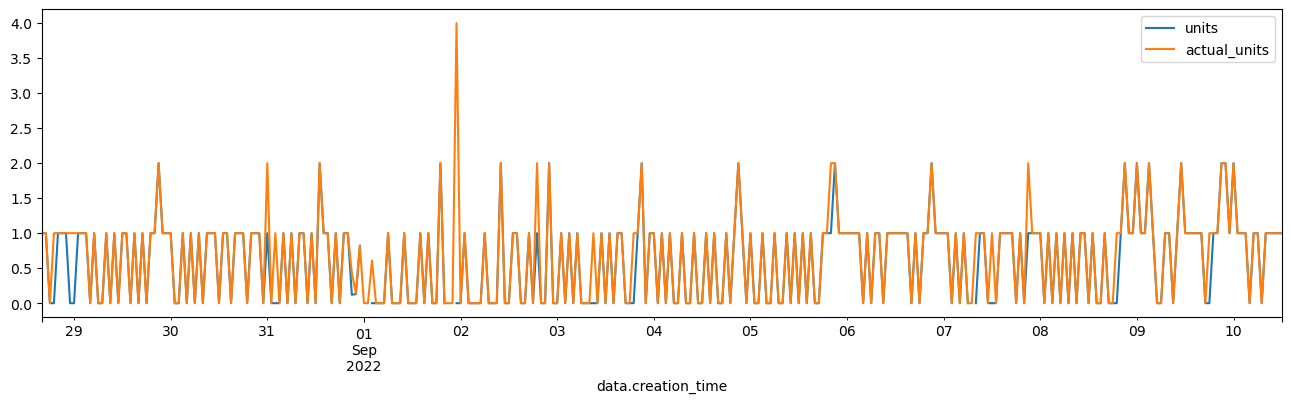

In [27]:
# df_resampled['2022-08-31 21:00:00':'2022-09-31 21:00:00']
df_resampled[['units','actual_units']]['2022-08-28 16:00:00':'2022-09-10 12:00:00'].plot(figsize=(16,4))

In [31]:
df_resampled[df_resampled['actual_units']>10]

,data.grid_reading_kwh,units,actual_units
data.creation_time,,,
2021-08-17 22:00:00,2320.0,2.0,11.0
2021-08-17 23:00:00,2322.0,2.0,15.0
2021-08-18 02:00:00,2325.0,1.0,11.0
2021-08-18 03:00:00,2327.0,2.0,13.0
2021-08-30 05:00:00,2525.0,1.0,11.0
2021-08-30 08:00:00,2526.0,1.0,12.0
2021-08-30 10:00:00,2527.0,1.0,13.0
2021-08-30 13:00:00,2528.0,1.0,14.0
2022-07-05 15:00:00,6421.0,1.0,16.0


In [32]:
df_resampled['2021-08-17 21:00:00':'2021-08-18 02:00:00']

,data.grid_reading_kwh,units,actual_units
data.creation_time,,,
2021-08-17 21:00:00,2318.0,1.0,7.0
2021-08-17 22:00:00,2320.0,2.0,11.0
2021-08-17 23:00:00,2322.0,2.0,15.0
2021-08-18 00:00:00,2323.0,0.0,9.0
2021-08-18 01:00:00,2324.0,1.0,10.0
2021-08-18 02:00:00,2325.0,1.0,11.0


In [35]:
df['2021-08-17 20:00:00':'2021-08-18 02:00:00'][0:50]

,data.grid_reading_kwh,data.grid_kwh_unit,data.status,data.meter_sr_no,data.error_reason,data.R_voltage,data.Y_volatge,data.B_voltage,data.r_current,data.y_current,data.b_current,site_id,location_id,data.cumm_pf,data.frequency
data.creation_time,,,,,,,,,,,,,,,
2021-08-17 20:01:41,2315.0,0.0,P,DAL0000950,No Consumption,246.2,247.4,241.3,2.25,0.0,8.67,6075bb51153a20.38235471,500000010232,0.98,50.1
2021-08-17 20:05:36,2315.0,0.0,P,DAL0000950,No Consumption,246.2,247.4,241.3,2.25,0.0,8.67,6075bb51153a20.38235471,500000010232,0.98,50.1
2021-08-17 20:09:32,2315.0,0.0,P,DAL0000950,No Consumption,246.3,246.6,241.8,2.04,0.0,8.82,6075bb51153a20.38235471,500000010232,0.99,50.2
2021-08-17 20:13:31,2315.0,0.0,P,DAL0000950,No Consumption,245.3,244.8,240.4,2.06,0.0,0.94,6075bb51153a20.38235471,500000010232,0.92,50.0
2021-08-17 20:17:28,2316.0,2.0,P,DAL0000950,Success,243.1,244.0,238.0,2.53,0.0,0.94,6075bb51153a20.38235471,500000010232,0.94,50.0
2021-08-17 20:21:26,2316.0,0.0,P,DAL0000950,No Consumption,242.4,241.3,237.7,2.55,0.0,0.96,6075bb51153a20.38235471,500000010232,0.94,49.9
2021-08-17 20:25:22,2316.0,0.0,P,DAL0000950,No Consumption,243.5,242.0,239.1,2.33,0.0,0.91,6075bb51153a20.38235471,500000010232,0.90,49.9
2021-08-17 20:29:20,2316.0,0.0,P,DAL0000950,No Consumption,245.1,242.6,238.6,2.06,0.0,0.91,6075bb51153a20.38235471,500000010232,0.93,49.9
2021-08-17 20:33:16,2316.0,0.0,P,DAL0000950,No Consumption,244.5,243.4,238.9,1.95,0.0,1.01,6075bb51153a20.38235471,500000010232,0.94,50.0
